In [2]:
!pip install matplotlib seaborn wordcloud

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 7.4 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.1 MB 9.3 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 8.4 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 8.5 MB/s  0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   -------------------------------- ------- 1.8/2.3 MB 10.0 MB/s eta 0:00:01
   ------------------------------

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [5]:
df = pd.read_csv('../data/processed/gojek_reviews_preprocessed.csv')
df.head()

,reviewId,userName,content,score,thumbsUpCount,at,replyContent,repliedAt,version,language,label,cleaned
0,1c637a3a-43d8-453a-8da5-48a2d26927bc,Sudarto,sangat membantu,5,0,2025-10-28T00:53:58,NaN,NaN,5.31.2,id,positive,bantu
1,e851b0c8-862d-4dca-b2db-875e6c03a625,kamu nanya,terlalu lama mendapatkan driver di daerah cipa...,1,0,2025-10-28T00:53:22,"Mohon maaf ya, Kak @kamu nanya. Kesulitan mend...",2025-10-28T07:01:18,5.35.1,id,negative,driver daerah cipanas keburu mood makan
2,1dab09ce-061f-4751-b58c-ef12b03753b8,FTHR,sampai saat ini masih oke,5,0,2025-10-28T00:00:17,NaN,NaN,5.36.2,id,positive,oke
3,da593ef8-bc9f-42ce-8aac-3ab0bb5e768f,Safitri Yenii,sangat membantu saya,5,0,2025-10-28T00:00:06,NaN,NaN,NaN,id,positive,bantu
4,3eb584fc-95bd-4c07-b9cb-b45850ea82a7,Hartono Jack,menyenangkan transaksi belanja mudah dan cepat,5,0,2025-10-27T23:44:59,NaN,NaN,NaN,id,positive,senang transaksi belanja mudah cepat


In [6]:
df.info()
df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98558 entries, 0 to 98557
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewId       98558 non-null  object
 1   userName       98557 non-null  object
 2   content        98558 non-null  object
 3   score          98558 non-null  int64 
 4   thumbsUpCount  98558 non-null  int64 
 5   at             98558 non-null  object
 6   replyContent   38019 non-null  object
 7   repliedAt      38019 non-null  object
 8   version        78181 non-null  object
 9   language       98558 non-null  object
 10  label          98558 non-null  object
 11  cleaned        96594 non-null  object
dtypes: int64(2), object(10)
memory usage: 9.0+ MB


label
positive    57666
negative    36199
neutral      4693
Name: count, dtype: int64

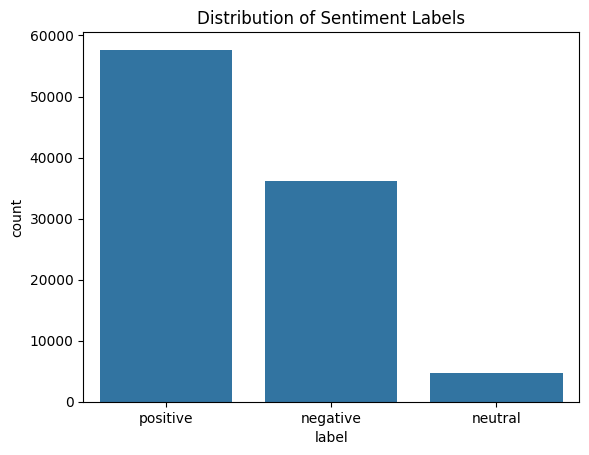

In [7]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Sentiment Labels')
plt.show()  

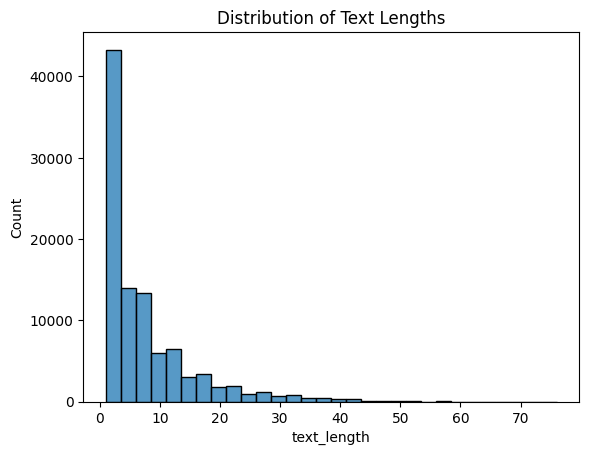

In [8]:
df['text_length'] = df['cleaned'].apply(lambda x: len(str(x).split()))
sns.histplot(data=df, x='text_length', bins=30)
plt.title('Distribution of Text Lengths')
plt.show()

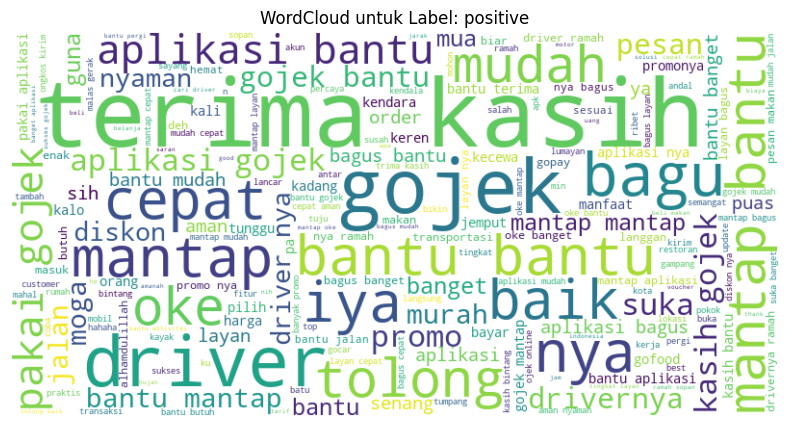

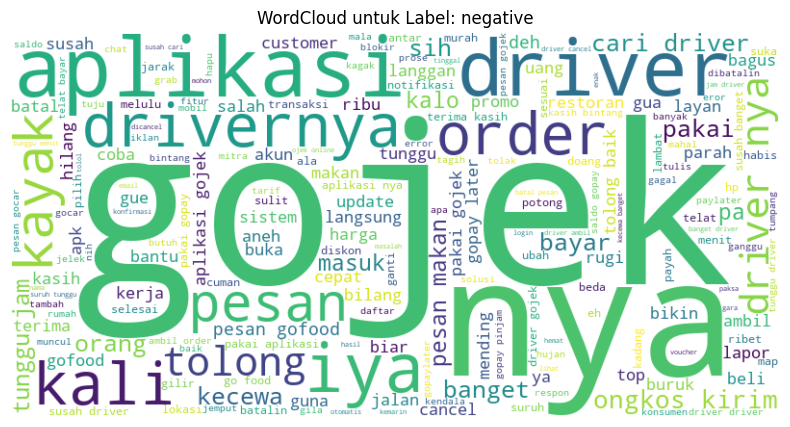

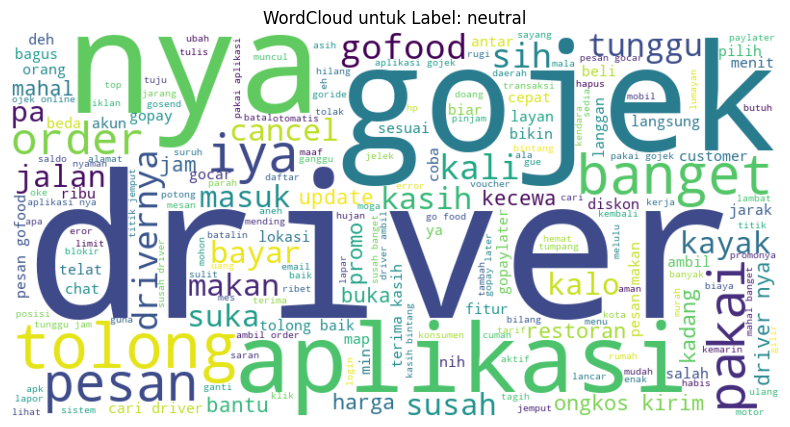

In [10]:
for label in df['label'].unique():
    text = ' '.join(df[df['label'] == label]['cleaned'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud untuk Label: {label}")
    plt.show()
